In [34]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784',version=1, cache=True, as_frame=False) #Hämtar MNIST enligt instruktion.
x = mnist["data"]
y = mnist["target"].astype(np.uint8)
print(mnist.DESCR)

 #Splittar datan i ett tränings set och ett test set på 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [35]:
from sklearn.ensemble import RandomForestClassifier     
from sklearn.model_selection import RandomizedSearchCV #importerar RandomizedSearchCV, för att söka efter bästa hyperparametrar.
from scipy.stats import randint

rf_clf = RandomForestClassifier(random_state=42) #Random Forest Classifier

# Definerar avstånden för de möjliga värderna hos hyperparametrarna som ska optimeras till RandomForestClassifier. 
param_dist = {"n_estimators": randint(1, 200),
              "max_depth": randint(1, 20),
              "min_samples_split": randint(2, 20)}

# Sätter upp den randomiserade sökningen med 5 iterationer och 3-fold cross validation. random_state är slumpmässig, men varje gång jag kör koden så blir det på samma sätt
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=5, cv=3, random_state=42, n_jobs=-1)

#RandomizedSearchCV testar olika kombination av hyperparametrar
random_search.fit(x_train, y_train)

#printar de bästa hyperparametrarna
print(random_search.best_params_)

{'max_depth': 19, 'min_samples_split': 12, 'n_estimators': 88}


In [37]:
#Importerar accuracy_score för att kunna mäta "accuracy" för modellens "prediction" mot de sanna värdena.
from sklearn.metrics import accuracy_score

# Här skapas variabeln för algoritmen med de bästa resultaten från RandomRorestClassifier
rf_clf = RandomForestClassifier(n_estimators=random_search.best_params_["n_estimators"], 
                                max_depth=random_search.best_params_["max_depth"], 
                                min_samples_split=random_search.best_params_["min_samples_split"], 
                                random_state=42)
#.fit adderas för att träna modellen. 
rf_clf.fit(x_train, y_train)

#.predict adderas för att göra "prediction" på test datan.
rf_predictions = rf_clf.predict(x_test)

# Beräknar modellens "predictions" gentemot de sanna värdena, y_test som är de sanna mot rf_predictions.
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy: ",rf_accuracy)

Accuracy:  0.9628571428571429


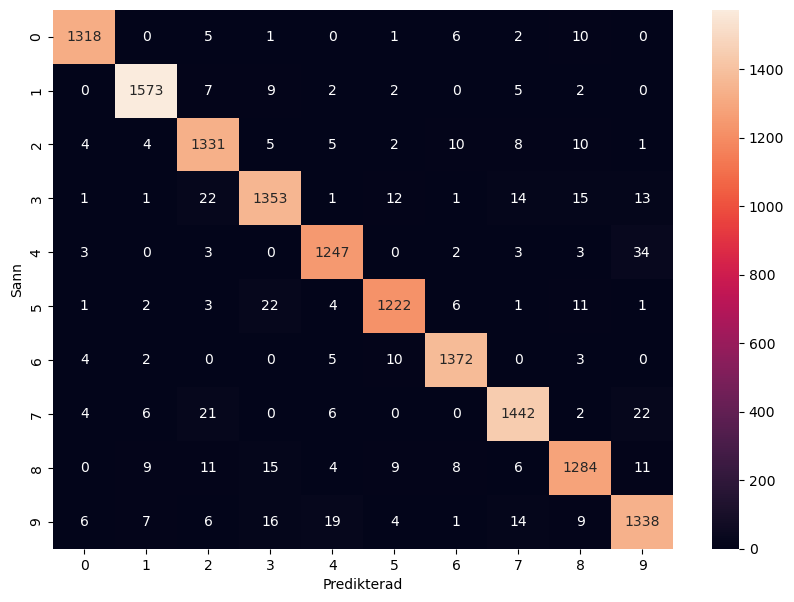

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sea

# Detta skapar en confusion matrix från de sanna värdena y_test och rf_predictions.
cm = confusion_matrix(y_test, rf_predictions)

plt.figure(figsize=(10,7)) #sätter dimensionerna på confusion matrix.
sea.heatmap(cm, annot=True, fmt="d") #cm variabel, annot för att skriva ut värdena, och fmt för att varje cell innehåller integer.
plt.xlabel("Predikterad")
plt.ylabel("Sann")
plt.show()